In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
# import Housing.csv
df = pd.read_csv('data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df = df.replace(to_replace = "yes", value = 1)
df = df.replace(to_replace = "no", value = 0) 

df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [10]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42)
print(len(df_train))
print(len(df_test))

381
164


alpha: 0.1 Train Score: 0.69 Test Score: 0.64
alpha: 11.2 Train Score: 0.69 Test Score: 0.64
alpha: 22.3 Train Score: 0.68 Test Score: 0.63
alpha: 33.4 Train Score: 0.68 Test Score: 0.62
alpha: 44.5 Train Score: 0.67 Test Score: 0.61
alpha: 55.6 Train Score: 0.66 Test Score: 0.61
alpha: 66.7 Train Score: 0.66 Test Score: 0.6
alpha: 77.8 Train Score: 0.65 Test Score: 0.59
alpha: 88.9 Train Score: 0.64 Test Score: 0.59
alpha: 100.0 Train Score: 0.64 Test Score: 0.58


Text(0.5, 1.0, 'Ridge regression model with polynomial degree =1')

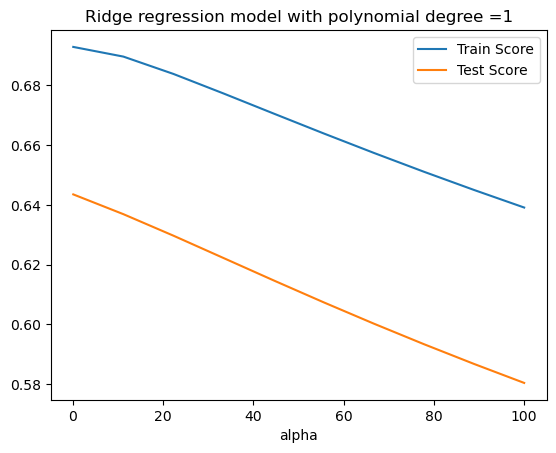

In [11]:
x_train = df_train.loc[:, df_train.columns != 'price']
x_train=x_train.to_numpy().reshape(-1,12)

y_train=df_train["price"]
y_train=y_train.to_numpy().reshape(-1,1)

x_test = df_test.loc[:, df_test.columns != 'price']
x_test =x_test.to_numpy().reshape(-1,12)

y_test=df_test["price"]
y_test=y_test.to_numpy().reshape(-1,1)

#model scores
train_scores=[]
test_scores=[]

#train model

alphas = np.linspace(0.1,100,num=10)

for i in alphas:

    poly = PolynomialFeatures(degree=1)
    poly_features = poly.fit_transform(x_train)
    
    model = Ridge(alpha = i)
    model.fit(poly_features, y_train)
    
    y_pred = model.predict(poly_features)
    R2_train= r2_score(y_train, y_pred)

    #test model    

    y_test_pred = model.predict(poly.fit_transform(x_test))
    R2_test= r2_score(y_test, y_test_pred)

    train_scores.append(R2_train)
    test_scores.append(R2_test)
    
    print("alpha:",round(i,1),"Train Score:",round(R2_train,2),"Test Score:",round(R2_test,2))
    
#plot scores for training data and test data acorss alpha values

plt.plot(alphas, train_scores, '-', label='Train Score')
plt.plot(alphas, test_scores, '-', label='Test Score')
plt.xlabel("alpha")
plt.legend()
plt.title("Ridge regression model with polynomial degree =1")

alpha: 0.1 Train Score: 0.22 Test Score: 0.14


Text(0.5, 1.0, 'Ridge regression model with polynomial degree =3')

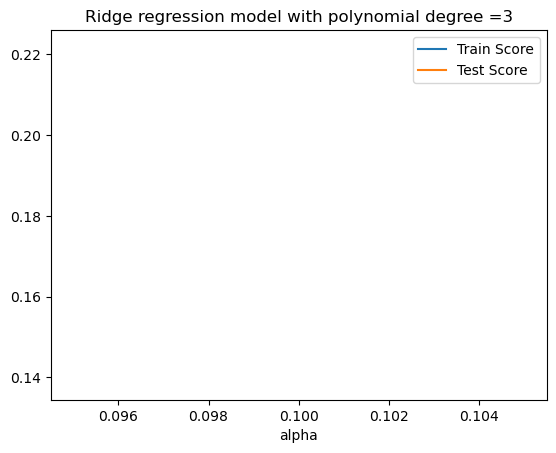

In [14]:
#model scores
train_scores=[]
test_scores=[]

#train model

alphas = np.linspace(0.1, 10,num=1)

for i in alphas:

    poly = PolynomialFeatures(degree=8)
    poly_features = poly.fit_transform(x_train)
    
    model = Ridge(alpha = i)
    model.fit(poly_features, y_train)
    
    y_pred = model.predict(poly_features)
    R2_train= r2_score(y_train, y_pred)

    #test model    

    y_test_pred = model.predict(poly.fit_transform(x_test))
    R2_test= r2_score(y_test, y_test_pred)

    train_scores.append(R2_train)
    test_scores.append(R2_test)
    
    print("alpha:",round(i,1),"Train Score:",round(R2_train,2),"Test Score:",round(R2_test,2))
    
#plot scores for training data and test data acorss alpha values

plt.plot(alphas, train_scores, '-', label='Train Score')
plt.plot(alphas, test_scores, '-', label='Test Score')
plt.xlabel("alpha")
plt.legend()
plt.title("Ridge regression model with polynomial degree =3")